<h1>United States Community Insights</h1>

Lab Four: Multi-Layer Perceptron 

Emily Liss

<H1>Business Understanding</H1>

In this project, we aim to use various pieces of information about different places to predict how many children in those areas are living in poverty. We have data about things like the number of people, the types of jobs they have, how they get to work, and more. These details can help us understand why child poverty happens and how it can be prevented. It's important because can help government agencies and organizations decide where to focus their efforts and resources to help children and their families in need. By using this data, we can create a tool to estimate child poverty rates in different areas and make informed decisions to reduce child poverty.

State and County: These variables provide geographical context and could help identify regional trends.

Demographic Features: 'TotalPop,' 'Men,' and 'Women' offer insights into the population structure, while the 'Hispanic,' 'White,' 'Black,' 'Native,' 'Asian,' and 'Pacific' variables provide information on the ethnic composition of the population.

Income and Employment: 'Income,' 'IncomeErr,' 'IncomePerCap,' 'IncomePerCapErr,' 'Professional,' 'Service,' 'Office,' 'Construction,' 'Production,' 'PrivateWork,' 'PublicWork,' 'SelfEmployed,' 'FamilyWork,' 'Employed,' and 'Unemployment' are indicators of economic well-being and employment status.

Transportation: 'Drive,' 'Carpool,' 'Transit,' 'Walk,' 'OtherTransp,' 'WorkAtHome,' and 'MeanCommute' provide insights into the transportation habits and commuting patterns of the population, which can affect access to employment opportunities.

Dataset Source: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data

<H2>Load and Prepare Data</H2>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Read in the dataset
ds = pd.read_csv('./acs2017_census_tract_data.csv')
#clean data, remove empty cells
ds = ds.drop(columns=['TractId'])
ds = ds.dropna()
label_encoder = LabelEncoder()
for column in ds.columns:
    if ds[column].dtype == 'object':
        ds[column] = label_encoder.fit_transform(ds[column])
ds.describe()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,...,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000
mean,24.340370,998.356941,4443.485121,2184.362647,2259.122473,17.282951,61.337143,13.254417,0.727776,4.752459,...,2.925778,1.886076,4.612646,26.080334,2081.309139,79.511827,14.149495,6.167661,0.171231,7.224917
std,15.102552,530.254496,2190.183318,1099.954423,1124.604806,23.084428,30.628031,21.581269,4.505791,8.995573,...,5.260623,2.485812,3.770733,7.095680,1120.109805,7.957350,7.164790,3.798703,0.451630,5.099419
min,0.000000,0.000000,58.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.200000,20.000000,17.500000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,545.000000,2958.000000,1440.000000,1494.000000,2.600000,38.100000,0.800000,0.000000,0.200000,...,0.400000,0.400000,2.000000,21.100000,1306.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,24.000000,1045.000000,4137.000000,2024.000000,2102.000000,7.400000,70.500000,3.800000,0.000000,1.500000,...,1.400000,1.200000,3.800000,25.400000,1915.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,38.000000,1433.750000,5532.750000,2719.000000,2817.000000,21.100000,87.700000,14.500000,0.400000,5.000000,...,3.300000,2.500000,6.300000,30.300000,2651.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,51.000000,1953.000000,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,99.400000,91.400000,...,77.700000,53.400000,82.800000,73.900000,28945.000000,100.000000,80.700000,47.400000,22.300000,62.800000


<h2>Let's Balance & Spilt!</h2>

In [37]:
from sklearn.model_selection import train_test_split

quarts = np.percentile(ds['ChildPoverty'], [25, 50, 75])
thresholds = [0] + list(quarts) + [100]

ds['ChildPovertyQuarter'] = pd.cut(ds['ChildPoverty'], bins=thresholds, labels=False, include_lowest=True)

X = ds.drop('ChildPoverty', axis=1) 
y = ds['ChildPovertyQuarter']

print(ds['ChildPovertyQuarter'].value_counts())

print(f"Here 0 represents child poverty percentages between 0-{quarts[0]}%, 1 percentages between {quarts[0]}-{quarts[1]}%, 2 between {quarts[1]}-{quarts[2]}%, and 3 between {quarts[2]}-100%.")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

0    18229
1    18171
3    18170
2    18148
Name: ChildPovertyQuarter, dtype: int64
Here 0 represents child poverty percentages between 0-6.2%, 1 percentages between 6.2-16.3%, 2 between 16.3-31.6%, and 3 between 31.6-100%.


<h2>Data Representaion</h2>

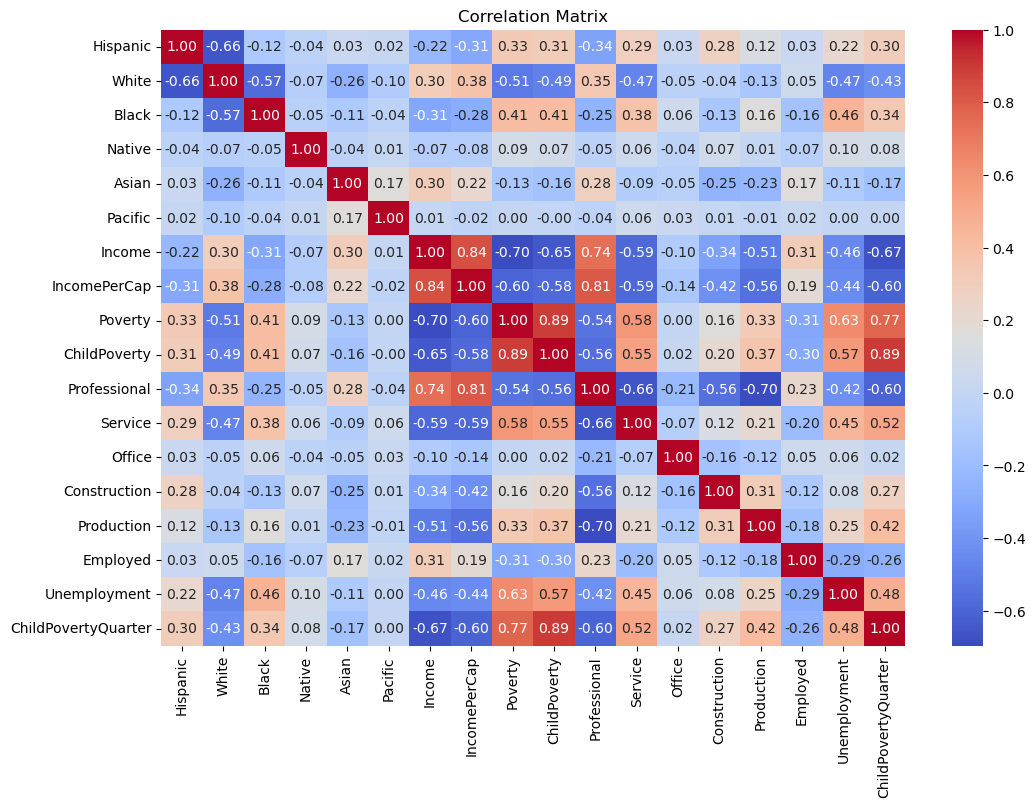

In [38]:
correlation = ds.drop(columns=['State','County','TotalPop','Men','Women','VotingAgeCitizen',
                                      'IncomeErr','IncomePerCapErr','Drive','Carpool','Transit','Walk',
                                      'OtherTransp','WorkAtHome', 'MeanCommute','PrivateWork','PublicWork',
                                      'SelfEmployed','FamilyWork']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h3>Should We Keep the County Variable?</h3>

Let's see if there's any correlation between the county and the variables we're examining!

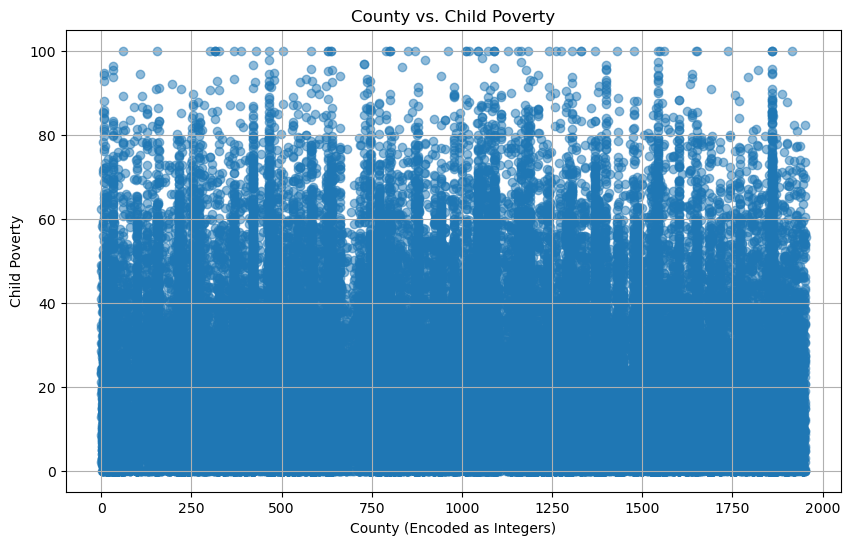

County and Child Poverty Correlation: -0.0237830796600439


In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(ds['County'], ds['ChildPoverty'], alpha=0.5)
plt.title("County vs. Child Poverty")
plt.xlabel("County (Encoded as Integers)")
plt.ylabel("Child Poverty")
plt.grid(True)
plt.show()

correlation = ds['County'].corr(ds['ChildPoverty'])

print("County and Child Poverty Correlation:", correlation)

There doesn't appear to be a correlation between the county and child poverty, meaning that it would be unnecessary to include the "County" coulmn.

In [40]:
ds = ds.drop(columns=['County'])

<h1>Two-Layer Perceptron Network</h1>
<h3>Let's quantify the performance and make sure that training converges!</h3>

In [41]:
#07. MLP Neural Networks.ipynb
from scipy.special import expit
import sys

class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, shuffle=True, minibatches=1, alpha=0.0, decrease_const=0.1, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches
        self.alpha = alpha        
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self, A3, Y_enc, W1, W2):
        """Get the cross-entropy loss function value."""
        epsilon = 1e-10  # Small constant to prevent division by zero
        cross_entropy = -np.mean(Y_enc * np.log(A3 + epsilon) + (1 - Y_enc) * np.log(1 - A3 + epsilon))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cross_entropy + L2_term

<h2>Extend the Base</h2>

In [42]:
#08. Practical_NeuralNets.ipynb
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X.T, how='row')
        A2 = self._sigmoid(W1 @ A1)
        A2 = self._add_bias_unit(A2, how='row')
        A3 = self._sigmoid(W2 @ A2)
        return A1, A2, A3
    
    def _get_gradient(self, A1, A2, A3, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
    
    def predict(self, X):
        """Predict class labels"""
        _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights() 

        self.cost_ = []
            
        for i in range(self.epochs):
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data.iloc[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, A2, A3 = self._feedforward(X_data.iloc[idx], self.W1, self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Y_enc=Y_enc[:, idx], W1=self.W1,W2=self.W2)
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2 

            self.cost_.append(mini_cost) 
            
        return self                 

<h2>Vectorized Gradient Computation</h2>

In [43]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

<h2>Cross Entropy Loss</h2>

In [44]:
def loss(m):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(m.cost_) + 1), m.cost_)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Convergence')
    plt.grid(True)
    plt.show()

<h2>Let's run it!</h2>

Epoch: 400/400

Accuracy: 24.37%


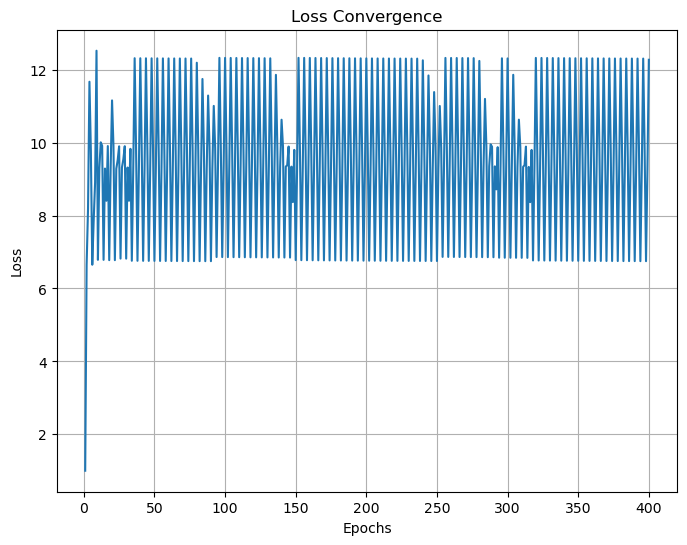

In [45]:
from sklearn.metrics import accuracy_score
accuracies = []
params = dict(n_hidden=50, C=0.1, epochs=400, eta=0.001, random_state=1)

nn = TwoLayerPerceptronVectorized(**params)
nn.fit(X_train, y_train, print_progress=50)
yhat = nn.predict(X_test)
accuracies.append(accuracy_score(y_test,yhat)*100)
print(f"Accuracy: {accuracies[0]:.2f}%")
loss(nn)

It ran, but with very low accuracy, lets see if we can make that any better with other models

<h2>Normalize the Continuous Numeric Feature Data</h2>

Accuracy: 99.97%


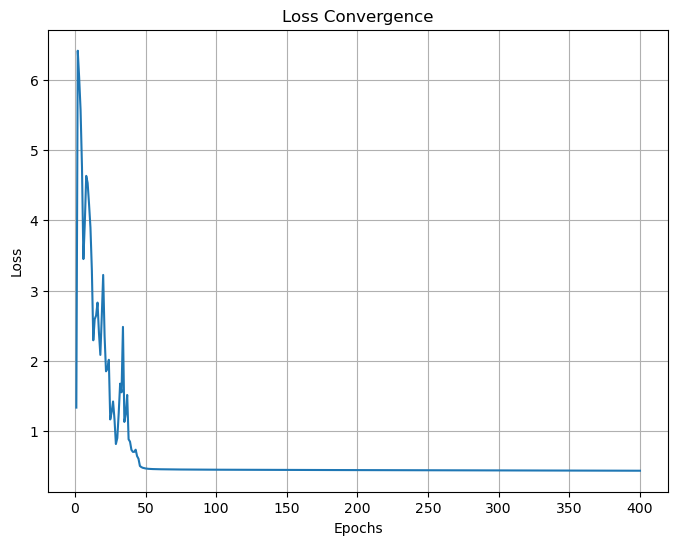

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_test_norm = pd.DataFrame(scaler.transform(X_test))

nn = TwoLayerPerceptronVectorized(**params)
nn.fit(X_train_norm, y_train)

y_pred = nn.predict(X_test_norm)

accuracies.append(accuracy_score(y_test,y_pred)*100)
print(f"Accuracy: {accuracies[1]:.2f}%")
loss(nn)

Well that worked! Amazing the difference normalizing your data can make. But let's see the difference with one more model

<h2>One-Hot Encode the Categorical Data</h2> 

Accuracy: 99.96%


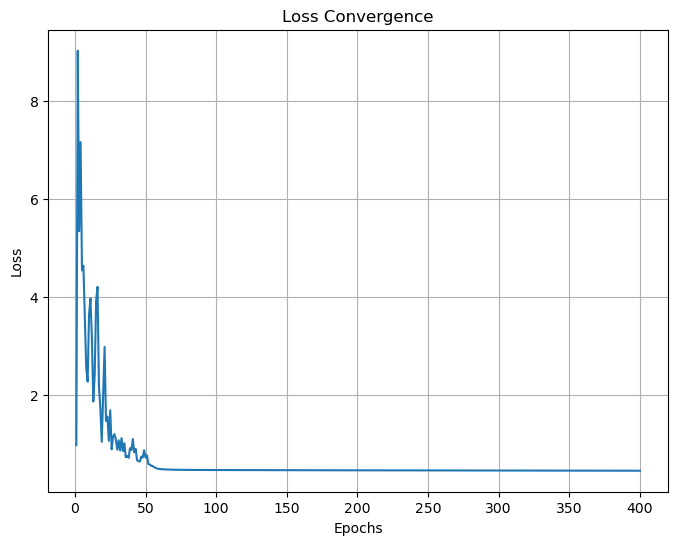

In [47]:
X_train_en = pd.DataFrame(X_train_norm)
X_train_normalized_encoded = pd.get_dummies(X_train_en, columns=[0]).astype(np.float64)

X_test_en = pd.DataFrame(X_test_norm)
X_test_normalized_encoded = pd.get_dummies(X_test_en, columns=[0]).astype(np.float64)

nn.fit(X_train_normalized_encoded, y_train)
y_pred = nn.predict(X_test_normalized_encoded)

accuracies.append(accuracy_score(y_test,y_pred)*100)
print(f"Accuracy: {accuracies[2]:.2f}%")
loss(nn)

<h2>Compare Performance!</h2>

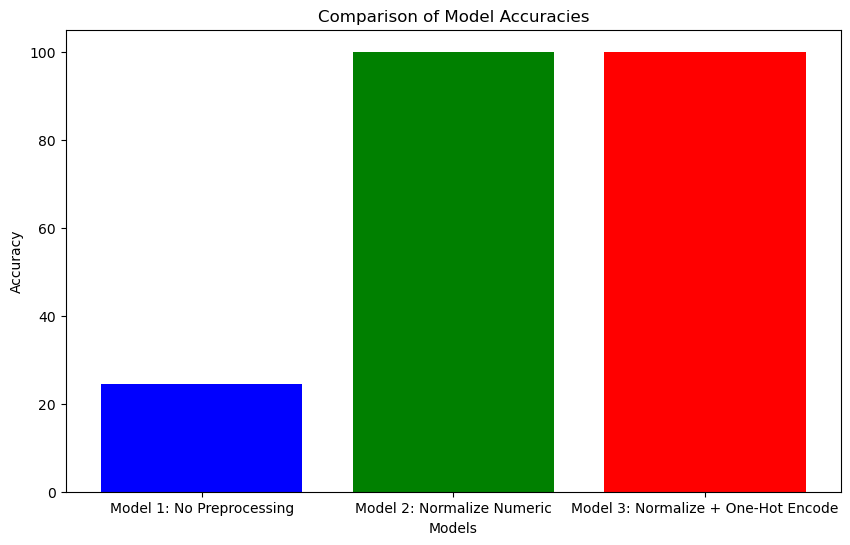

In [48]:
model_accuracies = {
    'Model 1: No Preprocessing': accuracies[0],
    'Model 2: Normalize Numeric': accuracies[1],
    'Model 3: Normalize + One-Hot Encode': accuracies[2]
}

model_names = model_accuracies.keys()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
#plt.bar(model_names, model_accuracies.values(), color=['blue', 'green'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

The first model had a low accuracy of 25% because it didn't prepare the data properly. The other two models, with 99% accuracy, did a better job by organizing the data and choosing the right settings. They made sure the data was easy for the model to understand by encoding and scaling it. These improvements helped the later models find the right answers more often.

<h1>Modeling</h1>

<h2>Add Support for a Third Layer</h2>

In [49]:
gradMag1, gradMag2, gradMag3 = [], [], []

class ThirdLayerPerceptron(TwoLayerPerceptronVectorized):   
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost for three layers"""
        # only compute for non-bias terms
        return (lambda_/2.0) * (np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)))
                            
    def _initialize_weights(self):
        """Initialize weights using Glorot initialization for a three-layer network."""
        init_range1 = np.sqrt(6.0 / (self.n_features_ + self.n_hidden))
        init_range2 = np.sqrt(6.0 / (self.n_hidden + 1))  # The +1 accounts for the bias term
        init_range3 = np.sqrt(6.0 / (self.n_hidden + 1))

        # Init weights for the first layer
        W1 = np.random.uniform(-init_range1, init_range1, size=(self.n_hidden, self.n_features_ + 1))

        # Init weights for the second layer
        W2 = np.random.uniform(-init_range2, init_range2, size=(self.n_hidden, self.n_hidden + 1))

        # Init weights for the third layer
        W3 = np.random.uniform(-init_range3, init_range3, size=(self.n_output_, self.n_hidden + 1))
        
        return W1, W2, W3
            
    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step for a three-layer neural network."""
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        A2 = self._sigmoid(W1 @ A1)
        A2 = self._add_bias_unit(A2, how='row')
        A3 = self._sigmoid(W2 @ A2)
        A3 = self._add_bias_unit(A3, how='row')
        A4 = self._sigmoid(W3 @ A3)
        return A1, A2, A3, A4
    
    def predict(self, X):
        """Predict class labels for a three-layer network"""
        _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)  # Include the third layer
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    def _get_gradient(self, A1, A2, A3, A4, yData, W1, W2, W3):
        """ Compute gradient step using backpropagation for a three-layer neural network.
        """
        V3 = (A4 - yData)
        grad3 = V3 @ A3.T

        V2 = (W3.T @ V3) * A3 * (1 - A3)
        grad2 = V2[1:, :] @ A2.T  # Ensure the shape matches A2

        V2 = V2[1:, :] #remove the bias
        V1 = (W2.T @ V2) * A2 * (1 - A2)
        grad1 = V1[1:, :] @ A1.T  # Ensure the shape matches A1

        # Regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3
    
    def _cost(self, A3, Y_enc, W1, W2, W3):
        """Get the cross-entropy loss function value for a three-layer network."""
        cost = -np.mean(np.nan_to_num(Y_enc * np.log1p(A3) + (1 - Y_enc) * np.log1p(1 - A3)))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        yData = pd.get_dummies(y).values.T
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = yData.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights() 

        self.cost_ = []
            
        for i in range(self.epochs):
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, yData = X_data.iloc[ridx], yData[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            g1, g2, g3 = [], [], []
            for idx in mini:
                # feedforward
                A1, A2, A3, A4 = self._feedforward(X_data.iloc[idx], self.W1, self.W2, self.W3)
                
                cost = self._cost(A4,yData[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, yData=yData, W1=self.W1, W2=self.W2, W3=self.W3)
                g1.append(np.linalg.norm(grad1))
                g2.append(np.linalg.norm(grad2))
                g3.append(np.linalg.norm(grad3))
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2
                self.W3 -= self.eta * grad3 
                
            gradMag1.append(sum(g1) / len(g1))
            gradMag2.append(sum(g2) / len(g2))
            gradMag3.append(sum(g3) / len(g3))
            self.cost_.append(mini_cost)
            
        return self    

Epoch: 400/400

Accuracy: 49.15%


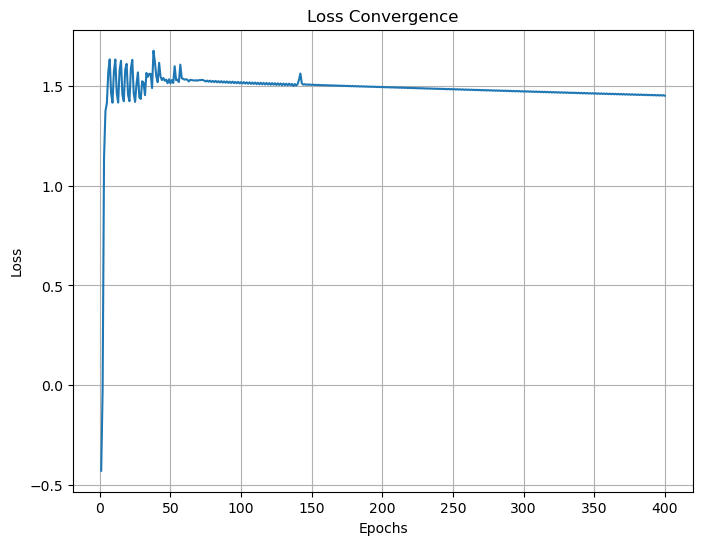

In [50]:
nn = ThirdLayerPerceptron(**params)
nn.fit(X_train_norm, y_train, print_progress=50)
yhat = nn.predict(X_test_norm)
accuracies.append(accuracy_score(y_test,yhat)*100)
print(f"Accuracy: {accuracies[3]:.2f}%")
loss(nn)

<h3>Let's Visualize the Gradient Magnitudes for All Three Layers</h3>

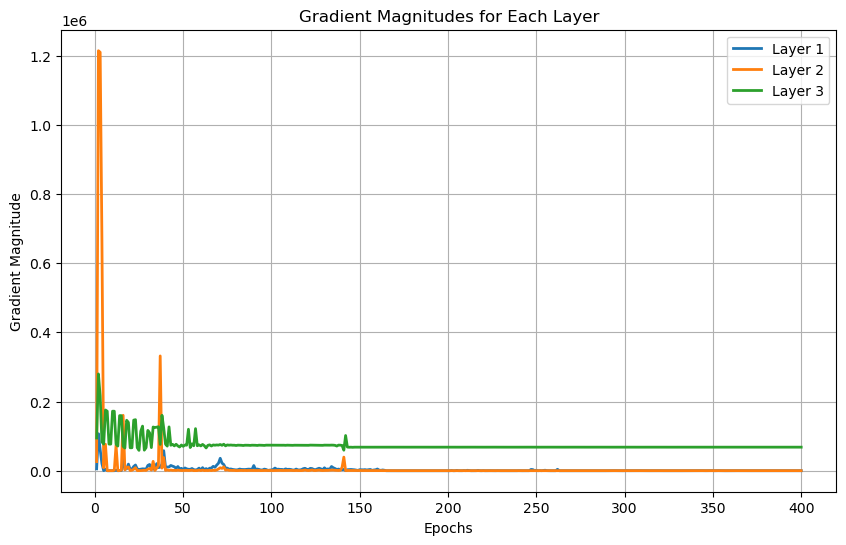

In [51]:
epochs = range(1, len(nn.cost_) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
plt.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
plt.plot(epochs, gradMag3, label='Layer 3', linewidth=2)  # Add for the third layer
plt.xlabel('Epochs')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.title('Gradient Magnitudes for Each Layer')
plt.grid(True)
plt.show()

<h3>Now Let's Look at the Magnitudes Indivdually</h3>

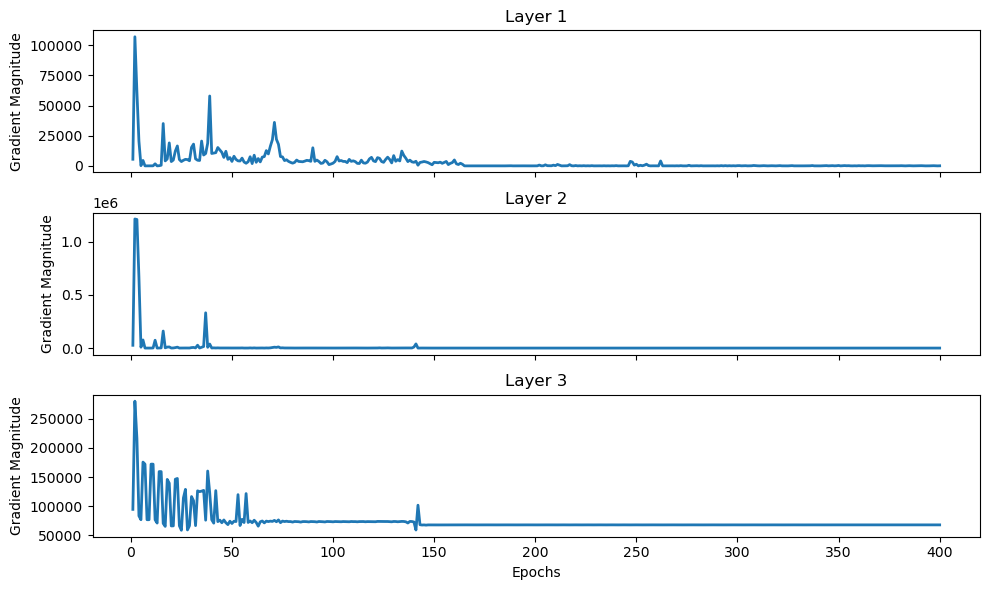

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
ax1.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
ax1.set_ylabel('Gradient Magnitude')
ax1.set_title('Layer 1')

ax2.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
ax2.set_ylabel('Gradient Magnitude')
ax2.set_title('Layer 2')

ax3.plot(epochs, gradMag3, label='Layer 3', linewidth=2)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Gradient Magnitude')
ax3.set_title('Layer 3')

plt.tight_layout()
plt.show()
plt.show()

<h2>Add Support for a Fourth Layer</h2>

In [53]:
gradMag1, gradMag2, gradMag3, gradMag4 = [], [], [], []

class FourthLayerPerceptron(TwoLayerPerceptronVectorized):
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost for four layers"""
        # only compute for non-bias terms
        return (lambda_/2.0) * (np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2)))
                            
    def _initialize_weights(self):
        """Initialize weights using Glorot initialization for a five-layer network."""
        init_range1 = np.sqrt(6.0 / (self.n_features_ + self.n_hidden))
        init_range2 = np.sqrt(6.0 / (self.n_hidden + 1))  # The +1 accounts for the bias term
        init_range3 = np.sqrt(6.0 / (self.n_hidden + 1))
        init_range4 = np.sqrt(6.0 / (self.n_hidden + 1))

        # Init weights for the first layer
        W1 = np.random.uniform(-init_range1, init_range1, size=(self.n_hidden, self.n_features_ + 1))
        # Init weights for the second layer
        W2 = np.random.uniform(-init_range2, init_range2, size=(self.n_hidden, self.n_hidden + 1))
        # Init weights for the third layer
        W3 = np.random.uniform(-init_range3, init_range3, size=(self.n_hidden, self.n_hidden + 1))
        # Init weights for the fourth layer
        W4 = np.random.uniform(-init_range4, init_range4, size=(self.n_output_, self.n_hidden + 1))
        return W1, W2, W3, W4
            
    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step for a four-layer neural network."""
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        A2 = self._sigmoid(W1 @ A1)
        A2 = self._add_bias_unit(A2, how='row')
        A3 = self._sigmoid(W2 @ A2)
        A3 = self._add_bias_unit(A3, how='row')
        A4 = self._sigmoid(W3 @ A3)
        A4 = self._add_bias_unit(A4, how='row')
        A5 = self._sigmoid(W4 @ A4)
        return A1, A2, A3, A4, A5
    
    def predict(self, X):
        """Predict class labels for a four-layer network"""
        _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)  # Include the third layer
        y_pred = np.argmax(A5, axis=0)
        return y_pred
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Y_enc, W1, W2, W3, W4):
        V4 = (A5 - Y_enc)
        grad4 = V4 @ A4.T

        V3 = (W4.T @ V4) * A4 * (1 - A4)
        grad3 = V3[1:, :] @ A3.T

        V3 = V3[1:, :]
        V2 = (W3.T @ V3) * A3 * (1 - A3)
        grad2 = V2[1:, :] @ A2.T

        V2 = V2[1:, :]
        V1 = (W2.T @ V2) * A2 * (1 - A2)
        grad1 = V1[1:, :] @ A1.T

        # Regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        return grad1, grad2, grad3, grad4
    
    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        """Get the cross-entropy loss function value for a four-layer network."""
        cost = -np.mean(np.nan_to_num(Y_enc * np.log1p(A5) + (1 - Y_enc) * np.log1p(1 - A5)))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 = self._initialize_weights() 

        self.cost_ = []
        g1, g2, g3, g4 = [], [], [], []
        for i in range(self.epochs):
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data.iloc[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward
                A1, A2, A3, A4, A5 = self._feedforward(X_data.iloc[idx], self.W1, self.W2, self.W3, self.W4)
                
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3, self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Y_enc=Y_enc, W1=self.W1, W2=self.W2, 
                                                                W3=self.W3, W4 = self.W4)

                g1.append(np.linalg.norm(grad1))
                g2.append(np.linalg.norm(grad2))
                g3.append(np.linalg.norm(grad3))
                g4.append(np.linalg.norm(grad4))
                
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2
                self.W3 -= self.eta * grad3 
                self.W4 -= self.eta * grad4 
                
            gradMag1.append(sum(g1) / len(g1))
            gradMag2.append(sum(g2) / len(g2))
            gradMag3.append(sum(g3) / len(g3))
            gradMag4.append(sum(g4) / len(g4))
            self.cost_.append(mini_cost)
            
        return self    

<h3>Run it With the Fourth Layer</h3>

Epoch: 400/400

Accuracy: 25.32%


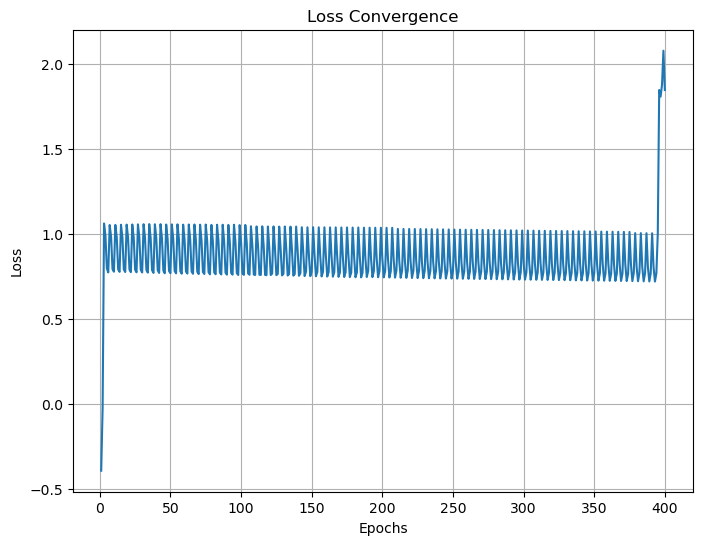

In [54]:
nn = FourthLayerPerceptron(**params)
nn.fit(X_train_norm, y_train, print_progress=50)
yhat = nn.predict(X_test_norm)
accuracies.append(accuracy_score(y_test,yhat)*100)
print(f"Accuracy: {accuracies[4]:.2f}%")
loss(nn)

<h3>Let's Visualize the Gradient Magnitudes for All Four Layers</h3>

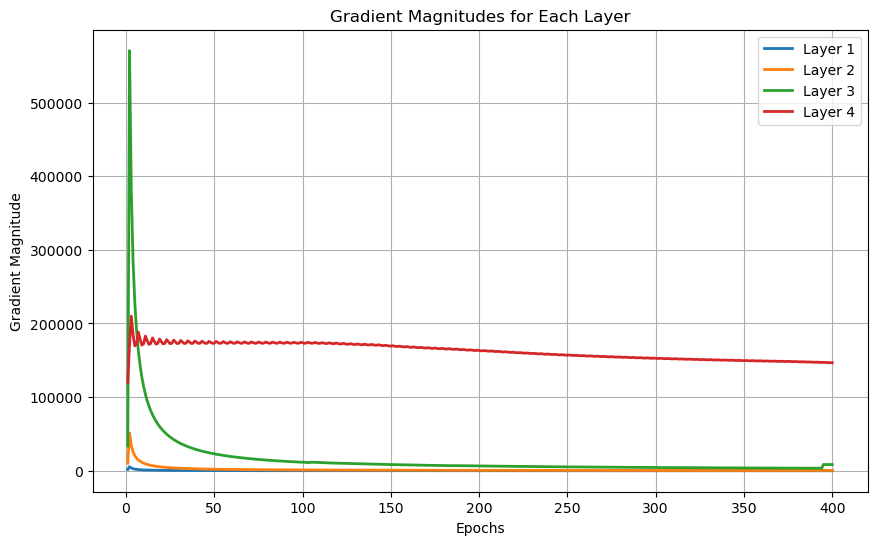

In [55]:
epochs = range(1, len(nn.cost_) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
plt.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
plt.plot(epochs, gradMag3, label='Layer 3', linewidth=2)  # Add for the third layer
plt.plot(epochs, gradMag4, label='Layer 4', linewidth=2)  # Add for the third layer
plt.xlabel('Epochs')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.title('Gradient Magnitudes for Each Layer')
plt.grid(True)
plt.show()

<h3>Now Let's Look at the Magnitudes Indivdually</h3>

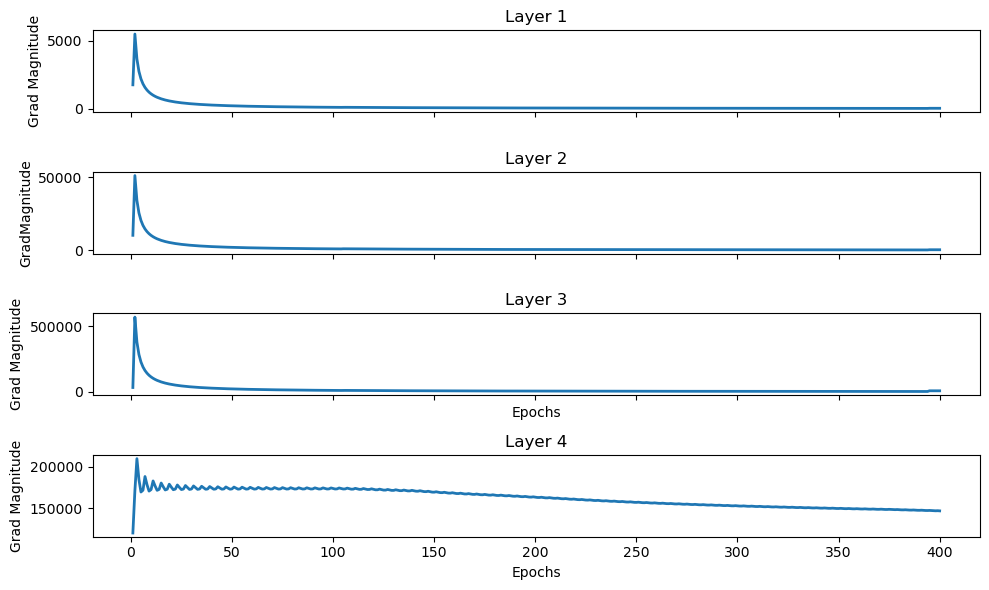

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
ax1.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
ax1.set_ylabel('Grad Magnitude')
ax1.set_title('Layer 1')

ax2.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
ax2.set_ylabel('GradMagnitude')
ax2.set_title('Layer 2')

ax3.plot(epochs, gradMag3, label='Layer 3', linewidth=2)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Grad Magnitude')
ax3.set_title('Layer 3')

ax4.plot(epochs, gradMag4, label='Layer 4', linewidth=2)
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Grad Magnitude')
ax4.set_title('Layer 4')

plt.tight_layout()
plt.show()
plt.show()

<h2>Add Support for a Fifth Layer</h2>

In [57]:
gradMag1, gradMag2, gradMag3, gradMag4, gradMag5 = [], [], [], [], []

class FifthLayerPerceptron(TwoLayerPerceptronVectorized):
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost for four layers"""
        # only compute for non-bias terms
        return (lambda_/2.0) * (np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2)))
                            
    def _initialize_weights(self):
        """Initialize weights using Glorot initialization for a five-layer network."""
        init_range1 = np.sqrt(6.0 / (self.n_features_ + self.n_hidden))
        init_range2 = np.sqrt(6.0 / (self.n_hidden + 1))  # The +1 accounts for the bias term
        init_range3 = np.sqrt(6.0 / (self.n_hidden + 1))
        init_range4 = np.sqrt(6.0 / (self.n_hidden + 1))
        init_range5 = np.sqrt(6.0 / (self.n_hidden + 1))

        W1 = np.random.uniform(-init_range1, init_range1, size=(self.n_hidden, self.n_features_ + 1))
        W2 = np.random.uniform(-init_range2, init_range2, size=(self.n_hidden, self.n_hidden + 1))
        W3 = np.random.uniform(-init_range3, init_range3, size=(self.n_hidden, self.n_hidden + 1))
        W4 = np.random.uniform(-init_range4, init_range4, size=(self.n_hidden, self.n_hidden + 1))
        W5 = np.random.uniform(-init_range5, init_range5, size=(self.n_output_, self.n_hidden + 1))
        return W1, W2, W3, W4, W5
            
    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step for a five-layer neural network."""
        A1 = self._add_bias_unit(X, how='column').T
        A2 = self._sigmoid(W1 @ A1)
        A2 = self._add_bias_unit(A2, how='row')
        A3 = self._sigmoid(W2 @ A2)
        A3 = self._add_bias_unit(A3, how='row')
        A4 = self._sigmoid(W3 @ A3)
        A4 = self._add_bias_unit(A4, how='row')
        A5 = self._sigmoid(W4 @ A4)
        A5 = self._add_bias_unit(A5, how='row')
        A6 = self._sigmoid(W5 @ A5)
        return A1, A2, A3, A4, A5, A6
    
    def predict(self, X):
        """Predict class labels for a four-layer network"""
        _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)  # Include the third layer
        y_pred = np.argmax(A6, axis=0)
        return y_pred
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Y_enc, W1, W2, W3, W4, W5):
        V5 = (A6 - Y_enc)
        grad5 = V5 @ A5.T

        V4 = (W5.T @ V5) * A5 * (1 - A5)
        grad4 = V4[1:, :] @ A4.T

        V4 = V4[1:, :]
        V3 = (W4.T @ V4) * A4 * (1 - A4)
        grad3 = V3[1:, :] @ A3.T

        V3 = V3[1:, :]
        V2 = (W3.T @ V3) * A3 * (1 - A3)
        grad2 = V2[1:, :] @ A2.T

        V2 = V2[1:, :]
        V1 = (W2.T @ V2) * A2 * (1 - A2)
        grad1 = V1[1:, :] @ A1.T

        # Regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C
        return grad1, grad2, grad3, grad4, grad5
    
    def _cost(self, A6, Y_enc, W1, W2, W3, W4, W5):
        epsilon = 1e-10
        cost = cost = -np.mean(Y_enc * np.log(A6 + epsilon) + (1 - Y_enc) * np.log(1 - A6 + epsilon))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights() 

        self.cost_ = []
        g1, g2, g3, g4, g5 = [], [], [], [], []
        for i in range(self.epochs):
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data.iloc[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward
                A1, A2, A3, A4, A5, A6 = self._feedforward(X_data.iloc[idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Y_enc=Y_enc, W1=self.W1, W2=self.W2, 
                                                                W3=self.W3, W4=self.W4, W5=self.W5)

                g1.append(np.linalg.norm(grad1))
                g2.append(np.linalg.norm(grad2))
                g3.append(np.linalg.norm(grad3))
                g4.append(np.linalg.norm(grad4))
                g5.append(np.linalg.norm(grad5))

                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2
                self.W3 -= self.eta * grad3 
                self.W4 -= self.eta * grad4 
                self.W5 -= self.eta * grad5
                
            gradMag1.append(sum(g1) / len(g1))
            gradMag2.append(sum(g2) / len(g2))
            gradMag3.append(sum(g3) / len(g3))
            gradMag4.append(sum(g4) / len(g4))
            gradMag5.append(sum(g5) / len(g5))

            self.cost_.append(mini_cost)
            
        return self    

<h3>Run it With the Fifth Layer</h3>

Epoch: 400/400

Accuracy: 24.37%


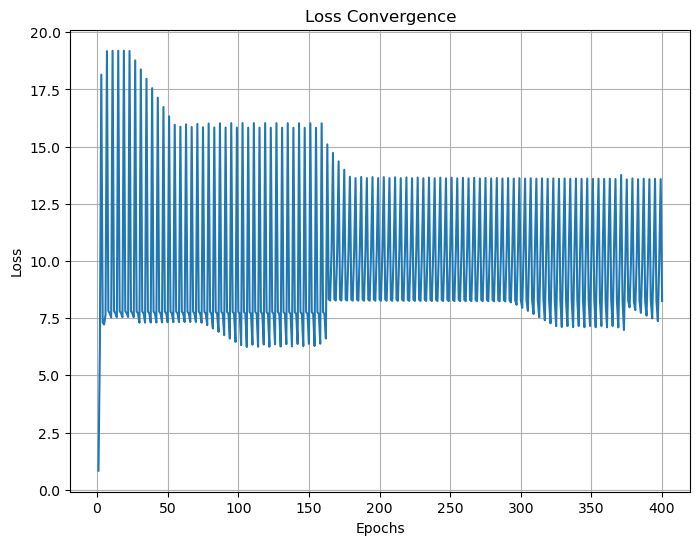

In [58]:
nn = FifthLayerPerceptron(**params)
nn.fit(X_train_norm, y_train, print_progress=50)
yhat = nn.predict(X_test_norm)
accuracies.append(accuracy_score(y_test,yhat)*100)
print(f"Accuracy: {accuracies[5]:.2f}%")
loss(nn)

<h3>Let's Visualize the Gradient Magnitudes for All Five Layers</h3>

400


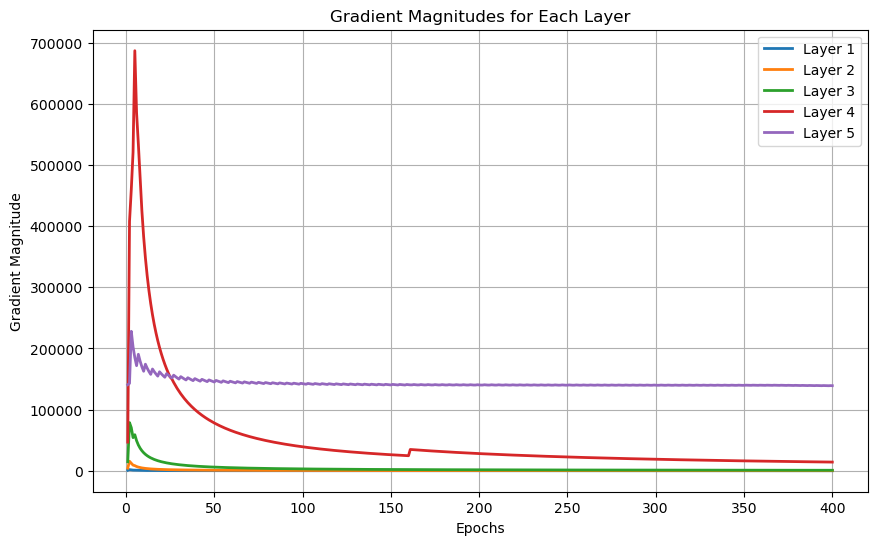

In [59]:
epochs = range(1, len(nn.cost_) + 1)
print(len(gradMag1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
plt.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
plt.plot(epochs, gradMag3, label='Layer 3', linewidth=2)  
plt.plot(epochs, gradMag4, label='Layer 4', linewidth=2)  
plt.plot(epochs, gradMag5, label='Layer 5', linewidth=2)  # Add for the fifth layer
plt.xlabel('Epochs')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.title('Gradient Magnitudes for Each Layer')
plt.grid(True)
plt.show()

<h3>Now Let's Look at the Magnitudes Indivdually</h3>

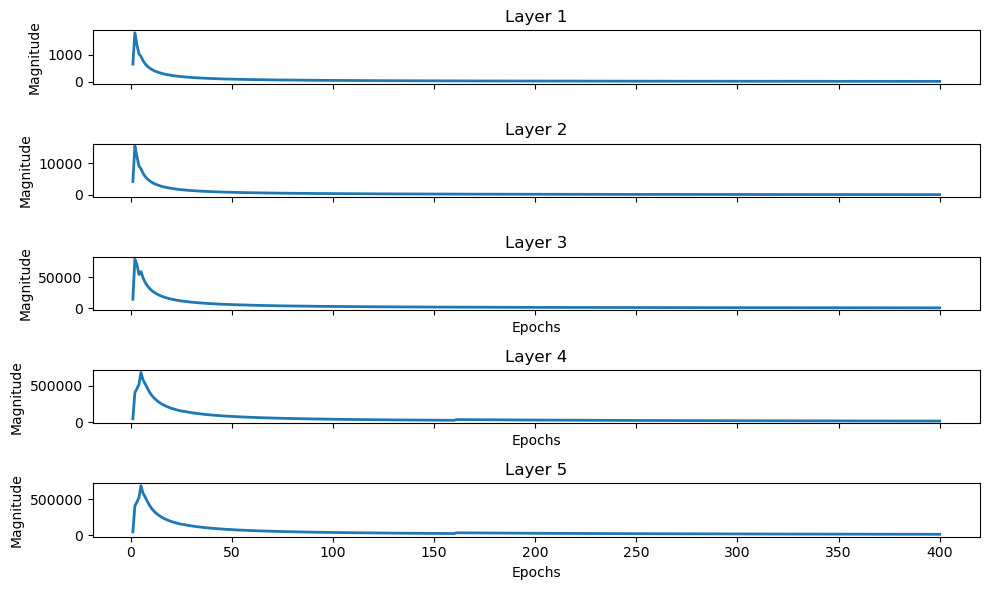

In [60]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 6), sharex=True)
ax1.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
ax1.set_ylabel('Magnitude')
ax1.set_title('Layer 1')

ax2.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
ax2.set_ylabel('Magnitude')
ax2.set_title('Layer 2')

ax3.plot(epochs, gradMag3, label='Layer 3', linewidth=2)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Magnitude')
ax3.set_title('Layer 3')

ax4.plot(epochs, gradMag4, label='Layer 4', linewidth=2)
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Magnitude')
ax4.set_title('Layer 4')

ax5.plot(epochs, gradMag4, label='Layer 5', linewidth=2)
ax5.set_xlabel('Epochs')
ax5.set_ylabel('Magnitude')
ax5.set_title('Layer 5')

plt.tight_layout()
plt.show()
plt.show()

<h2>Implement an Adaptive Learning Technique</h2>
<h3>Adaptive Gradient Descent</h3>

In [61]:
#08a. Practical_NeuralNets with Bias.ipynb
gradMag1, gradMag2, gradMag3, gradMag4, gradMag5 = [], [], [], [], [] 
class AdaGrad(FifthLayerPerceptron):
    def __init__(self, decrease_const=0.1, decrease_iter=20, **kwds):
        super().__init__(**kwds)
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights() 

        # adaptive G for entire gradient
        ada_grad1 = np.zeros(self.W1.shape)
        ada_grad2 = np.zeros(self.W2.shape)
        ada_grad3 = np.zeros(self.W3.shape)
        ada_grad4 = np.zeros(self.W4.shape)
        ada_grad5 = np.zeros(self.W5.shape)

        epsilon = 1e-8 

        self.cost_ = []
        g1, g2, g3, g4, g5 = [], [], [], [], []
        for i in range(self.epochs):
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data.iloc[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward
                A1, A2, A3, A4, A5, A6 = self._feedforward(X_data.iloc[idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                
                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Y_enc=Y_enc, W1=self.W1, W2=self.W2, 
                                                                W3=self.W3, W4=self.W4, W5=self.W5)
                ada_grad1 += grad1 ** 2
                ada_grad2 += grad2 ** 2
                ada_grad3 += grad3 ** 2
                ada_grad4 += grad4 ** 2
                ada_grad5 += grad5 ** 2

                self.W1 -= (self.eta / (np.sqrt(ada_grad1) + epsilon)) * grad1
                self.W2 -= (self.eta / (np.sqrt(ada_grad2) + epsilon)) * grad2
                self.W3 -= (self.eta / (np.sqrt(ada_grad3) + epsilon)) * grad3
                self.W4 -= (self.eta / (np.sqrt(ada_grad4) + epsilon)) * grad4
                self.W5 -= (self.eta / (np.sqrt(ada_grad5) + epsilon)) * grad5

                g1.append(np.linalg.norm(grad1))
                g2.append(np.linalg.norm(grad2))
                g3.append(np.linalg.norm(grad3))
                g4.append(np.linalg.norm(grad4))
                g5.append(np.linalg.norm(grad5))
                
            gradMag1.append(sum(g1) / len(g1))
            gradMag2.append(sum(g2) / len(g2))
            gradMag3.append(sum(g3) / len(g3))
            gradMag4.append(sum(g4) / len(g4))
            gradMag5.append(sum(g5) / len(g5))

            self.cost_.append(mini_cost)
            
        return self   

<h2>Let's Run it With AdaGrad</h2>

Epoch: 400/400

Accuracy: 27.874037403740378%
Accuracy: 27.87%


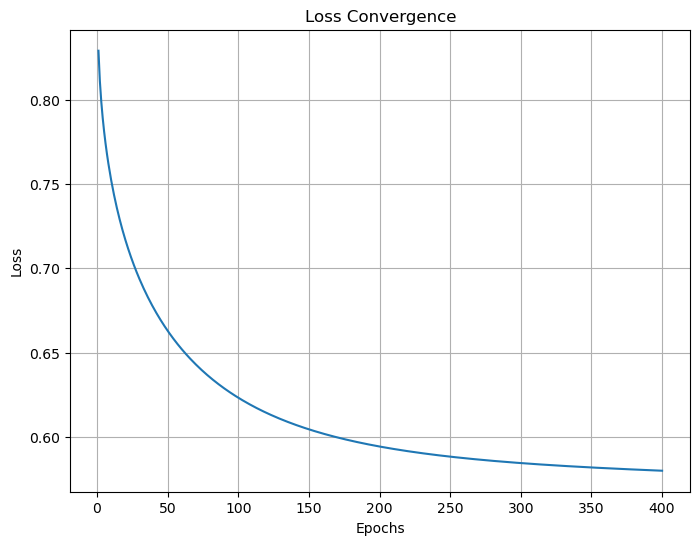

In [62]:
nn = AdaGrad(decrease_const=0.1, decrease_iter=20, **params)
nn.fit(X_train_norm, y_train, print_progress=50)
yhat = nn.predict(X_test_norm)
accuracies.append(accuracy_score(y_test,yhat)*100)
print(f"Accuracy: {accuracy_score(y_test,yhat)*100}%")
print(f"Accuracy: {accuracies[6]:.2f}%")
loss(nn)

<h3>Let's Visualize the Gradient Magnitudes for All Five Layers</h3>

400


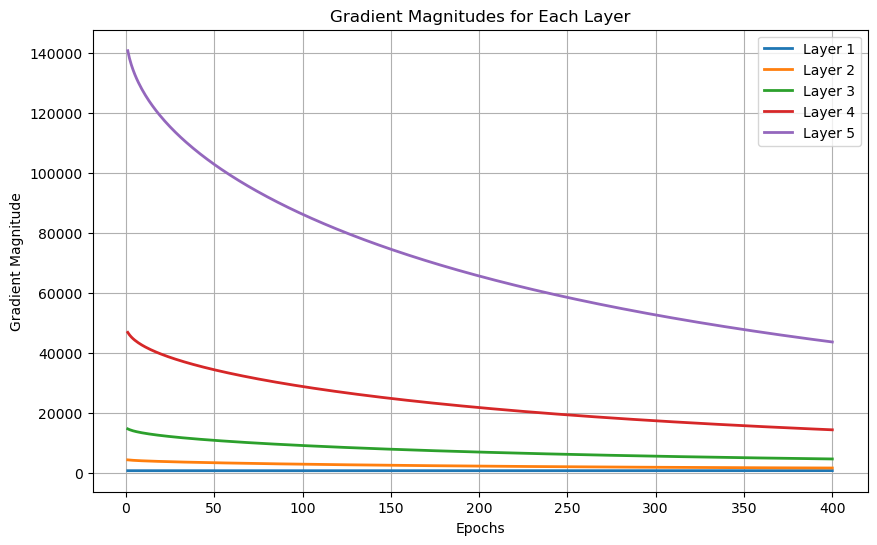

In [63]:
epochs = range(1, len(nn.cost_) + 1)
print(len(gradMag1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
plt.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
plt.plot(epochs, gradMag3, label='Layer 3', linewidth=2)  
plt.plot(epochs, gradMag4, label='Layer 4', linewidth=2)  
plt.plot(epochs, gradMag5, label='Layer 5', linewidth=2)  # Add for the fifth layer
plt.xlabel('Epochs')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.title('Gradient Magnitudes for Each Layer')
plt.grid(True)
plt.show()

<h3>Now Let's Look at the Magnitudes Indivdually</h3>

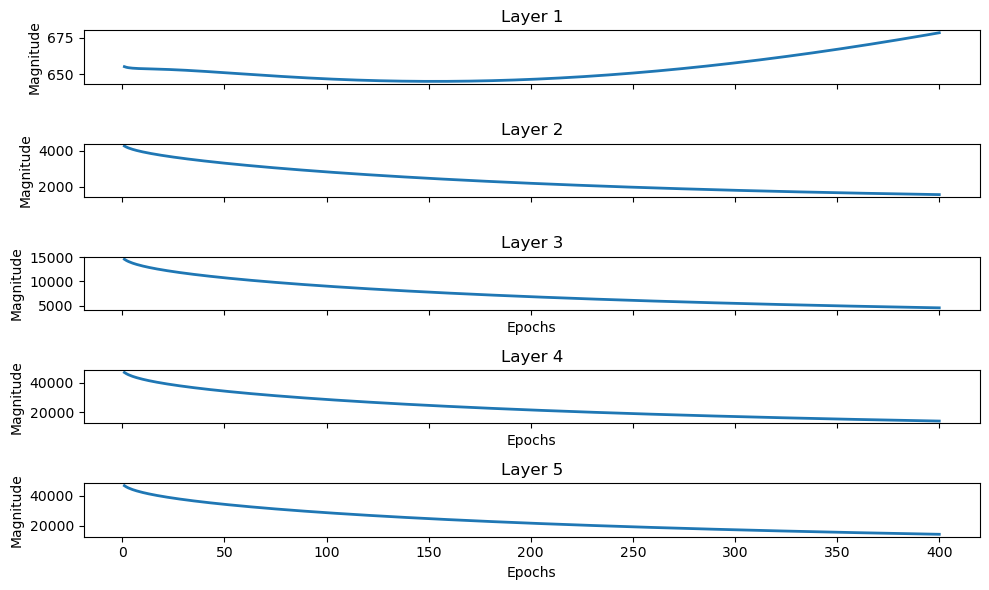

In [64]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 6), sharex=True)
ax1.plot(epochs, gradMag1, label='Layer 1', linewidth=2)
ax1.set_ylabel('Magnitude')
ax1.set_title('Layer 1')

ax2.plot(epochs, gradMag2, label='Layer 2', linewidth=2)
ax2.set_ylabel('Magnitude')
ax2.set_title('Layer 2')

ax3.plot(epochs, gradMag3, label='Layer 3', linewidth=2)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Magnitude')
ax3.set_title('Layer 3')

ax4.plot(epochs, gradMag4, label='Layer 4', linewidth=2)
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Magnitude')
ax4.set_title('Layer 4')

ax5.plot(epochs, gradMag4, label='Layer 5', linewidth=2)
ax5.set_xlabel('Epochs')
ax5.set_ylabel('Magnitude')
ax5.set_title('Layer 5')

plt.tight_layout()
plt.show()
plt.show()

<h2>Compare Performace Across All Models</h2>

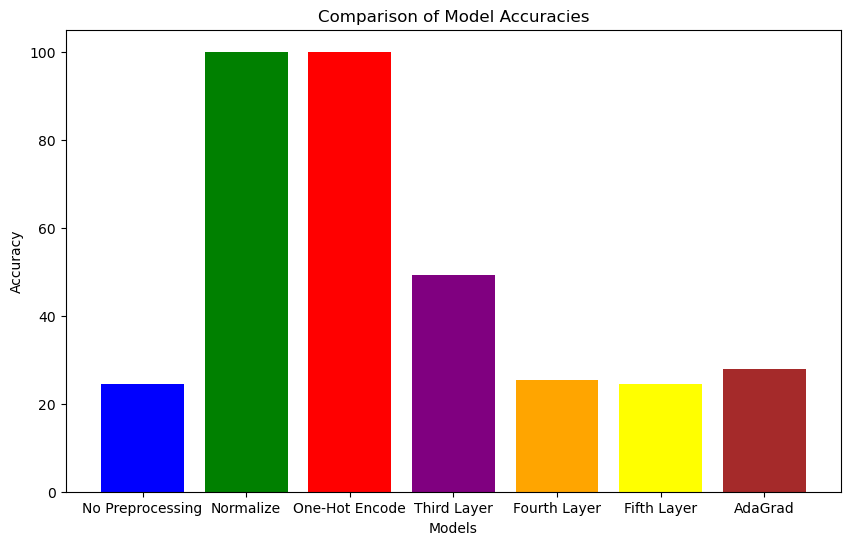

In [65]:
model_accuracies = {
    'No Preprocessing': accuracies[0],
    'Normalize': accuracies[1],
    'One-Hot Encode': accuracies[2],
    'Third Layer' : accuracies[3],
    'Fourth Layer' : accuracies[4],
    'Fifth Layer' : accuracies[5],
    'AdaGrad': accuracies[6]
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

When I added the third layer, the accuracy dropped from 99% to around 50% because the extra complexity made it harder for the neural network to learn effectively. It became a bit too complicated for the task. Then, when I added the fourth and fifth layers, accuracy decreased to 25% because the model became even more complex and likely overfit to the training data. This complexity didn't generalize well to new data, causing a drop in performance. 